<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - ML Models for Tabular Datasets <br>
<font color=696880 size=4>
    Niloufar Razani 
    
    
____

### Full Name : Shayan Salehi
### Student Number : 99105561
___

<font face="Times New Roman" size=4><div dir=ltr>
In this homework we are going to implement Adaboost algorithm from scratch. Please read this chapter's <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/tree/main/Jupyter_Notebooks/Chapter_04_Tabular_Data_Models"><font face="Roboto">notebook</font></a> and then complete the #TODO sections. <br>
We will use the heart_disease.csv dataset, which you can see more details about in this <a href="https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download&select=heart.csv"><font face="Roboto">Link</font></a>.
___

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import zero_one_loss

### Data Prepration (10 points) 
1.   Load Dataset
2.   Separate target feaure
3.   Change class labels to 1 and -1
4.   Do train-test split

In [31]:
dataset = pd.read_csv("heart_disease.csv")
dataset['target'] = dataset['target'] * 2 - 1
x_train, x_test, y_train, y_test = train_test_split(dataset.drop(['target'], axis = 1).to_numpy(), dataset['target'].to_numpy(), test_size = 0.3, random_state = 42)

### Adaboost Algorithm Implementation (40 points)

In [32]:
def calculate_error(y, y_pred, w):
    sum = 0
    for i in range(len(y)):
        if(y[i] != y_pred[i]): sum += w[i]
    return sum

def calculate_alpha(error):
    return (np.log((1 - error) / error) * 0.5)
    
def update_weights(w, alpha, y, y_pred):
    result = w
    cons = (np.not_equal(y, y_pred)).astype(int)
    result *= np.exp(alpha * cons)
    return result
      
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.training_errors = []
        self.index_x = dataset.drop(['target'], axis = 1).to_numpy()
        self.index_y = dataset['target'].to_numpy()

    def fit(self, X, y, M = 100):
        
        self.alphas = [] 
        self.training_errors = []
        self.M = M

        for m in range(0, M):
            if m == 0:
                w = [(1 / len(X)) for i in range(len(X))]
                 
            else:
                w = [float(i) / sum(w) for i in w]

            
            decision_tree = DecisionTreeClassifier(max_depth = 1)
            decision_tree.fit(X, y, sample_weight = w)
            prediction = decision_tree.predict(X)
            self.G_M.append(decision_tree)

            error = calculate_error(y, prediction, w)
            self.training_errors.append(error)
            alpha = calculate_alpha(error)
            self.alphas.append(alpha)
            w = update_weights(w, alpha, y, prediction)

    def predict(self, X):

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred

### Training and Evaluation (20 points)

In [33]:
decision_model = AdaBoost()
decision_model.fit(x_train, y_train)
prediction = decision_model.predict(x_test)

print("The accuracy of the decision model is: ", end = "")
print(accuracy_score(y_test, prediction));
print("The presicion of the decision model is: ", end = "")
print(precision_score(y_test, prediction));
print("The recall of the decision model is: ", end = "")
print(recall_score(y_test, prediction));
print("The f1-score of the decision model is: ", end = "")
print(f1_score(y_test, prediction));

The accuracy of the decision model is: 0.8246753246753247
The presicion of the decision model is: 0.7987421383647799
The recall of the decision model is: 0.8523489932885906
The f1-score of the decision model is: 0.8246753246753248


In [34]:
adaboost_model = AdaBoostClassifier(n_estimators = 100, random_state = 0)
adaboost_model.fit(x_train, y_train)
adaboost_model_prediction = adaboost_model.predict(x_test)

print("The accuracy of the adaboost model is: ", end = "")
print(accuracy_score(y_test, adaboost_model_prediction));
print("The presicion of the adaboost model is: ", end = "")
print(precision_score(y_test, adaboost_model_prediction));
print("The recall of the adaboost model is: ", end = "")
print(recall_score(y_test, adaboost_model_prediction));
print("The f1-score of the adaboost model is: ", end = "")
print(f1_score(y_test, adaboost_model_prediction));

The accuracy of the adaboost model is: 0.8961038961038961
The presicion of the adaboost model is: 0.903448275862069
The recall of the adaboost model is: 0.8791946308724832
The f1-score of the adaboost model is: 0.891156462585034


### Early Stopping (15 points)

In [39]:
predicted_errors = []
estimator_counter = np.arange(5, 350, 5)
for number in estimator_counter:
    adaboost_model = AdaBoostClassifier(n_estimators = number)
    adaboost_model.fit(x_train, y_train)
    predicted_errors.append(zero_one_loss(y_test, adaboost_model.predict(x_test)))

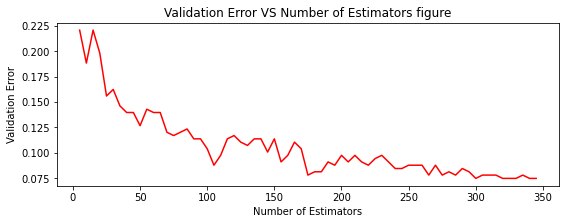

In [43]:
plt.figure(figsize=(9, 3))
plt.plot(estimator_counter , predicted_errors, color = "red")
plt.title('Validation Error VS Number of Estimators figure')
plt.ylabel('Validation Error')
plt.xlabel('Number of Estimators')
plt.show()

In [44]:
index = np.argmin(predicted_errors)
print("The best number for estimators is: ", end = "");
print(estimator_counter[np.argmin(predicted_errors)]);
print("The minimum value for validation error is: ", end = "");
print(predicted_errors[np.argmin(predicted_errors)]);

The best number for estimators is: 300
The minimum value for validation error is: 0.07467532467532467


### Weighted Error (10 points)

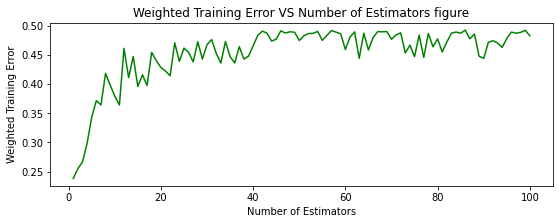

In [46]:
adaboost_classifier = AdaBoost()
adaboost_classifier.fit(x_train, y_train)
train_errors = adaboost_classifier.training_errors
estimator_counter = np.arange(1, 101)

plt.figure(figsize=(9, 3))
plt.plot(estimator_counter , train_errors, color = "green")
plt.title('Weighted Training Error VS Number of Estimators figure')
plt.ylabel('Weighted Training Error')
plt.xlabel('Number of Estimators')
plt.show()

### Question : Why does the weighted error tend to increase as the number of estimators increase? (5points)

We know that from the beginning, every sample's weight is equal. That leads to better-trained models and lower calculated error. as the number of estimators increases, samples' weight tends to lean to a different amount. This translation of weights makes the training model prefer a few chosen samples with more weight than the whole data, leading to more prediction errors.